In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
housing = fetch_california_housing()

In [5]:
#creating a dataframe of the dataset

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


##The dataset comes preprocessed so let's visualize the dataset and perform some regression for target variable

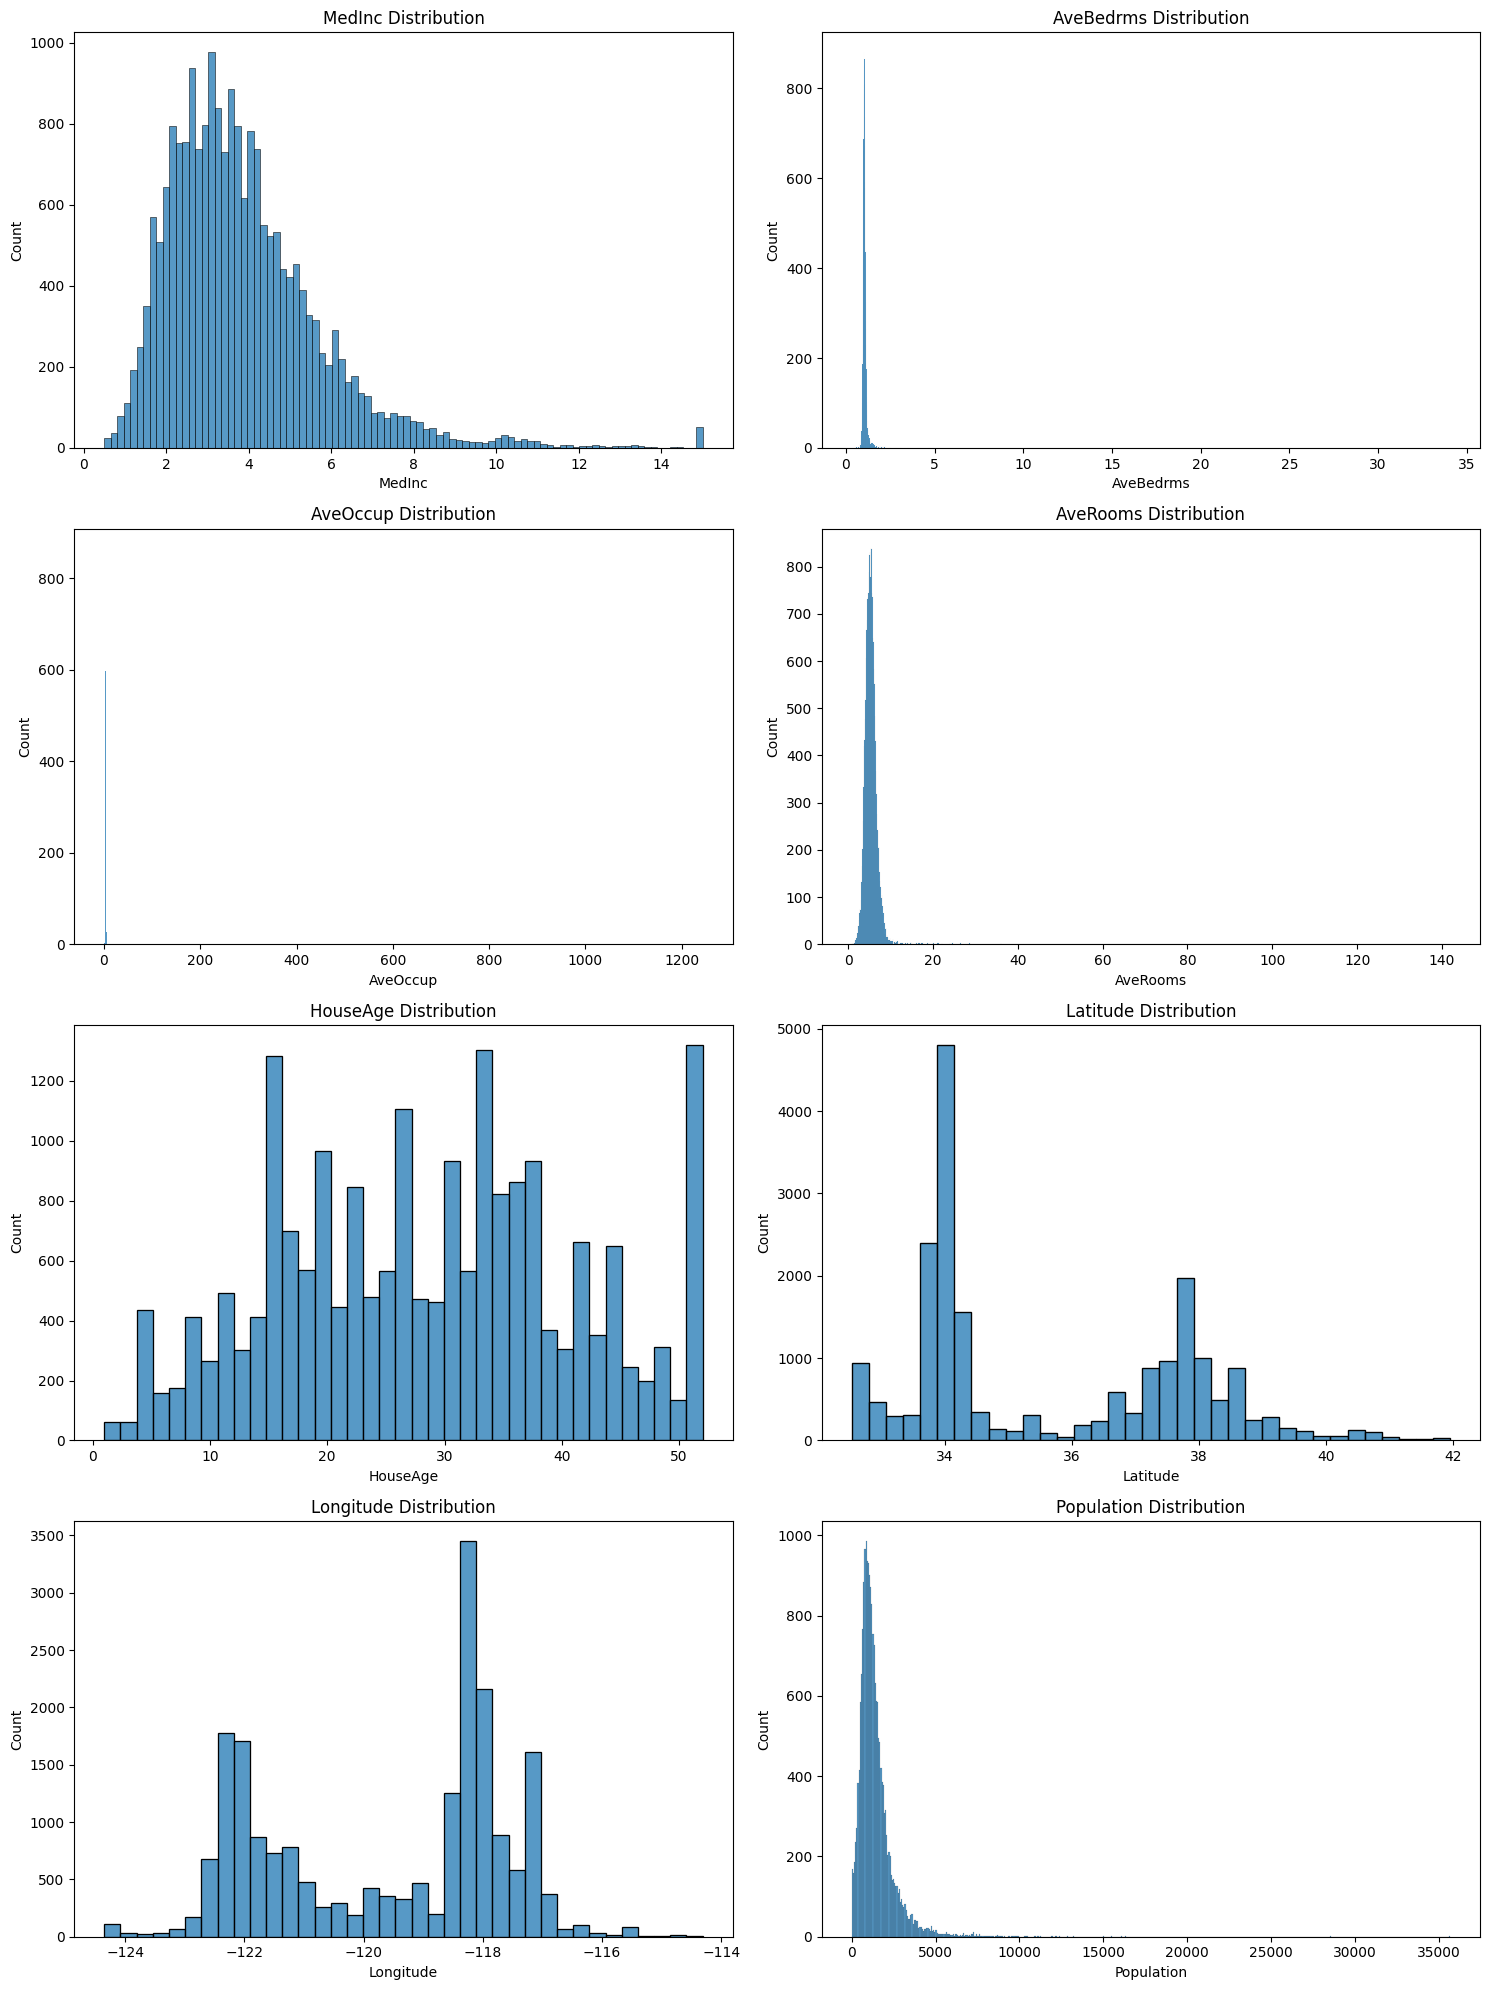

In [8]:
#univariate analysis

fig, axes = plt.subplots(4, 2, figsize = (15, 20))
axes = axes.ravel()

features = ['MedInc', 'AveBedrms', 'AveOccup', 'AveRooms', 'HouseAge', 'Latitude', 'Longitude', 'Population']
for i, feature in enumerate(features):
    sns.histplot(df[feature], ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')

plt.tight_layout()

plt.show()

#Above we can see the distribution of features accross continous range of values

#Now, let's perform some Bivariate analysis

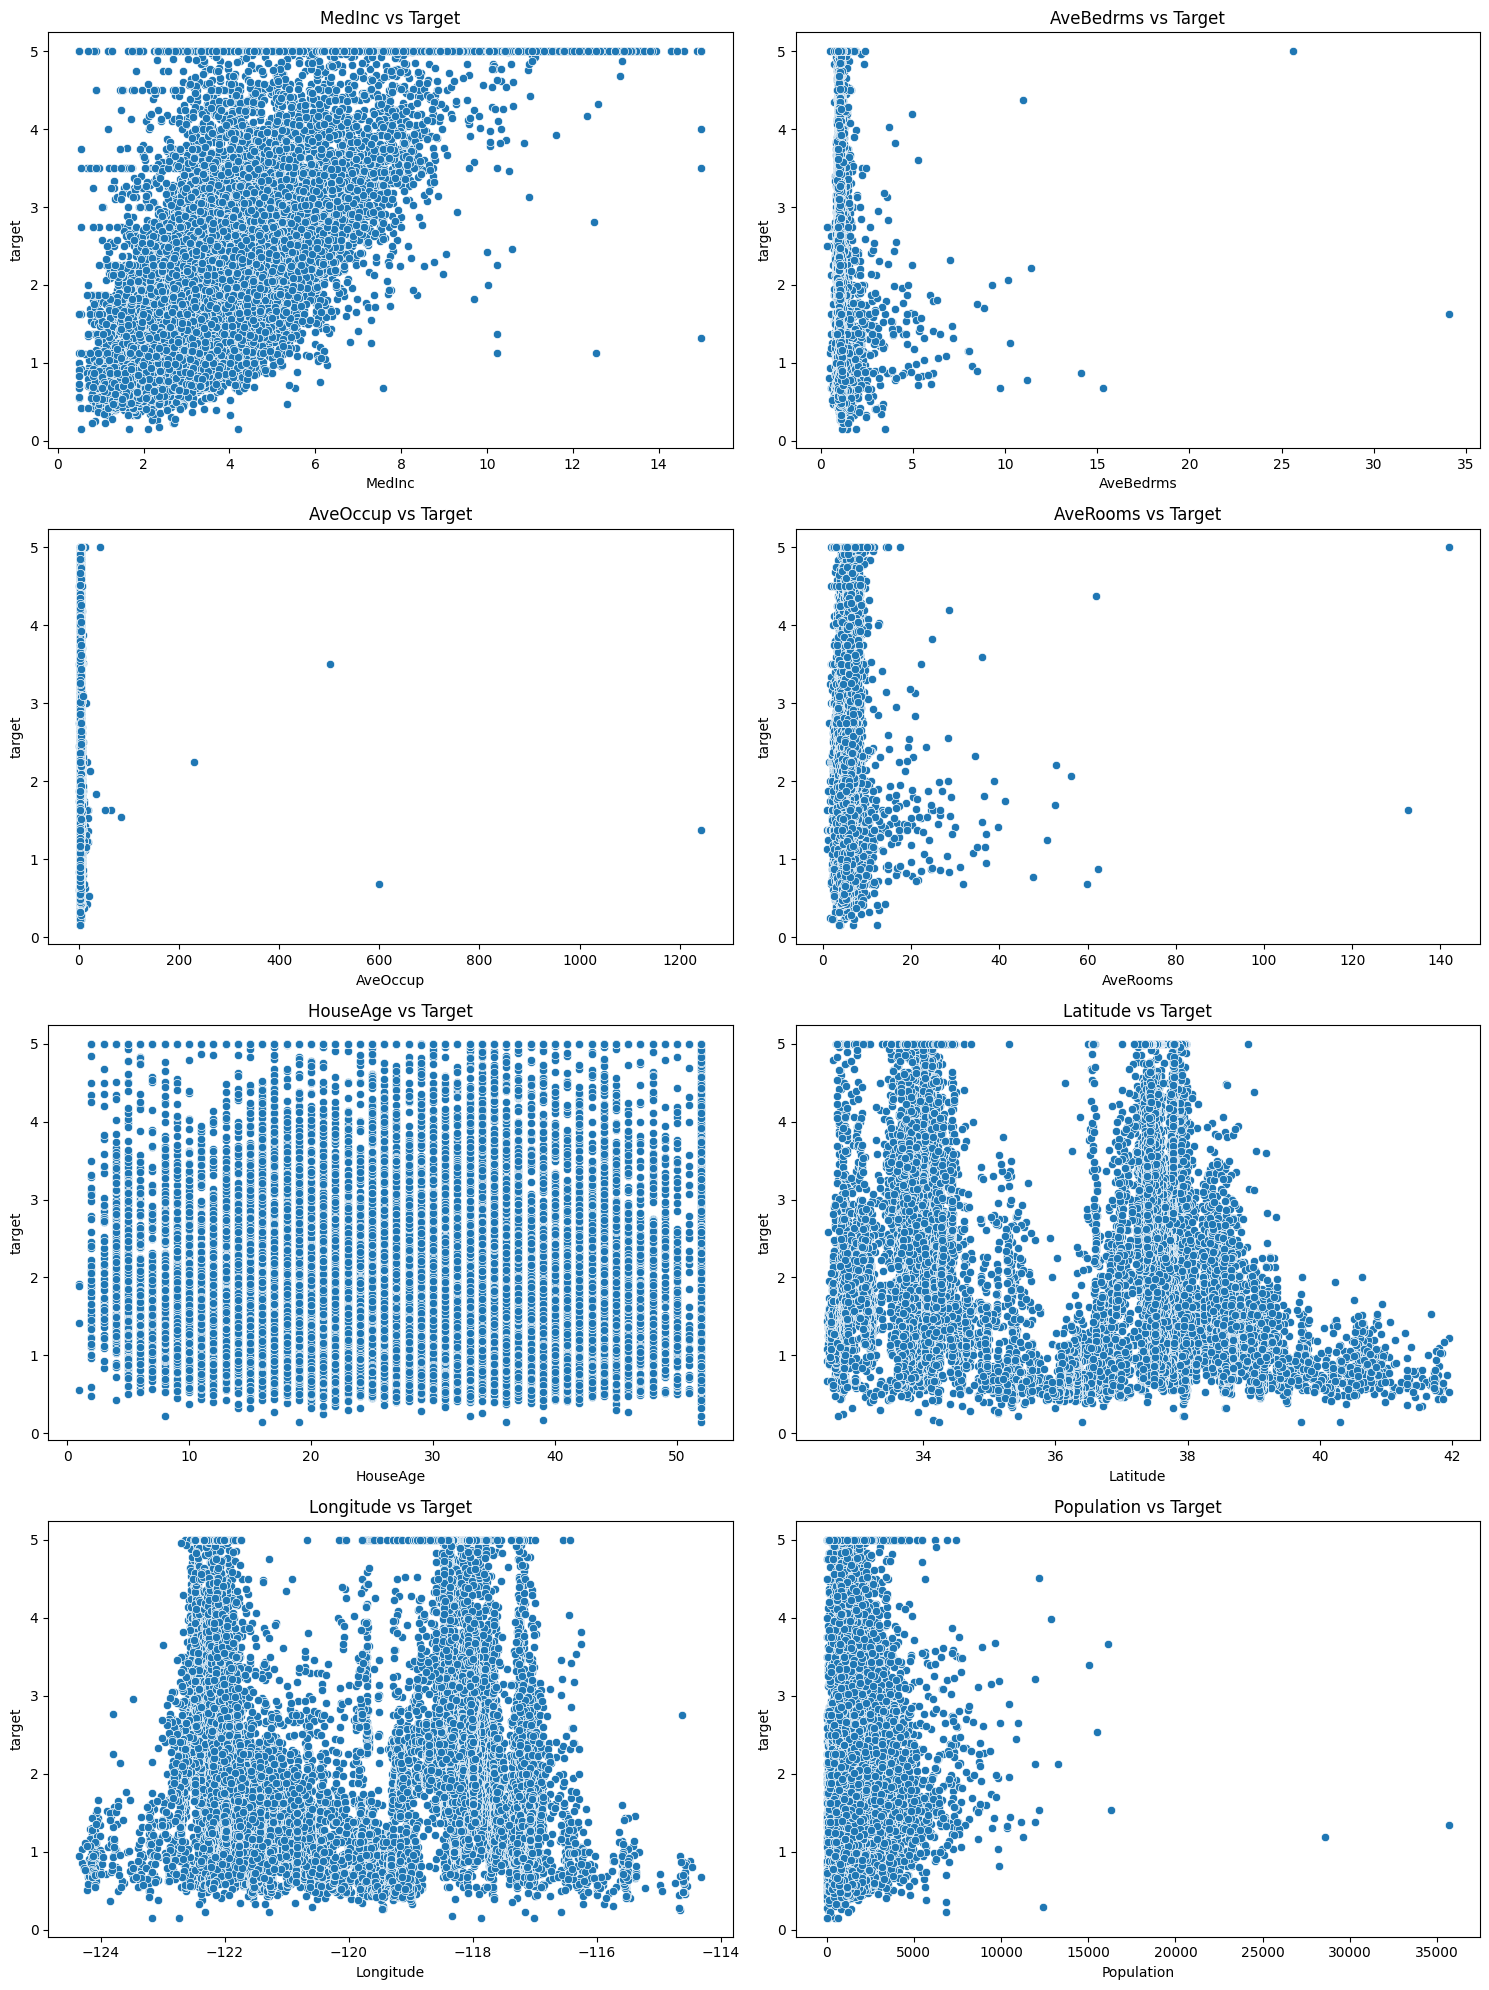

In [9]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 4 rows, 2 columns
axes = axes.ravel()  # Flatten the 2D grid into 1D for easy iteration

features = ['MedInc', 'AveBedrms', 'AveOccup', 'AveRooms', 'HouseAge', 'Latitude', 'Longitude', 'Population']
for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df['target'], ax=axes[i])
    axes[i].set_title(f'{feature} vs Target')

plt.tight_layout()
plt.show()

<Axes: >

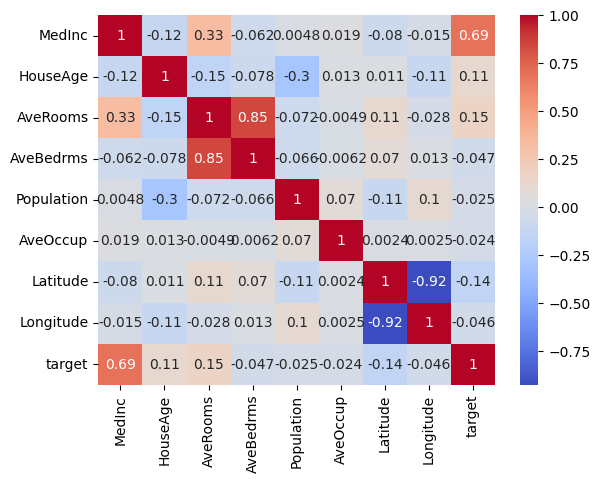

In [10]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

#here, we can see correlation between features themselves and feature-target correlation the higly correlated features include avgrooms-avgbdrooms, target-NedInc, latitude-longitude

let's now check between the relationship between features using scatterplot

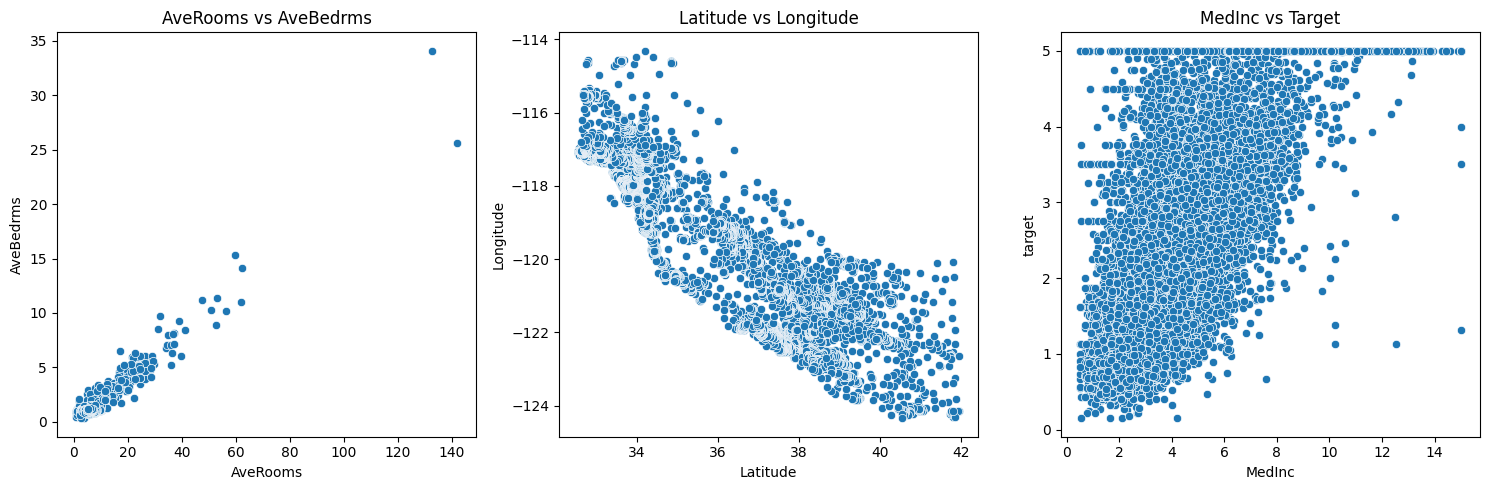

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot AveRooms vs AveBedrms
sns.scatterplot(x=df['AveRooms'], y=df['AveBedrms'], ax=axes[0])
axes[0].set_title('AveRooms vs AveBedrms')

# Plot Latitude vs Longitude
sns.scatterplot(x=df['Latitude'], y=df['Longitude'], ax=axes[1])
axes[1].set_title('Latitude vs Longitude')

# Plot MedInc vs Target
sns.scatterplot(x=df['MedInc'], y=df['target'], ax=axes[2])
axes[2].set_title('MedInc vs Target')

plt.tight_layout()
plt.show()

#combining highly correlated values

In [12]:
df['RoomToBedroomRatio'] = df['AveRooms'] / df['AveBedrms']
df.drop(columns=['AveRooms', 'AveBedrms'], inplace=True)

In [13]:
from sklearn.cluster import KMeans
coords = df[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['RegionCluster'] = kmeans.fit_predict(coords)

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the Population column
df['Population_standardized'] = scaler.fit_transform(df[['Population']])
df.drop(columns=['Population'], inplace=True)

In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(df.drop('target', axis=1), df['target'])
feature_importances = pd.Series(model.feature_importances_, index=df.columns[:-1])
print(feature_importances.sort_values(ascending=False))

MedInc                0.482030
AveOccup              0.128926
Longitude             0.096528
Latitude              0.090980
RoomToBedroomRatio    0.086516
HouseAge              0.046896
target                0.036469
RegionCluster         0.031654
dtype: float64


<ipython-input-16-47a330979cc7>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


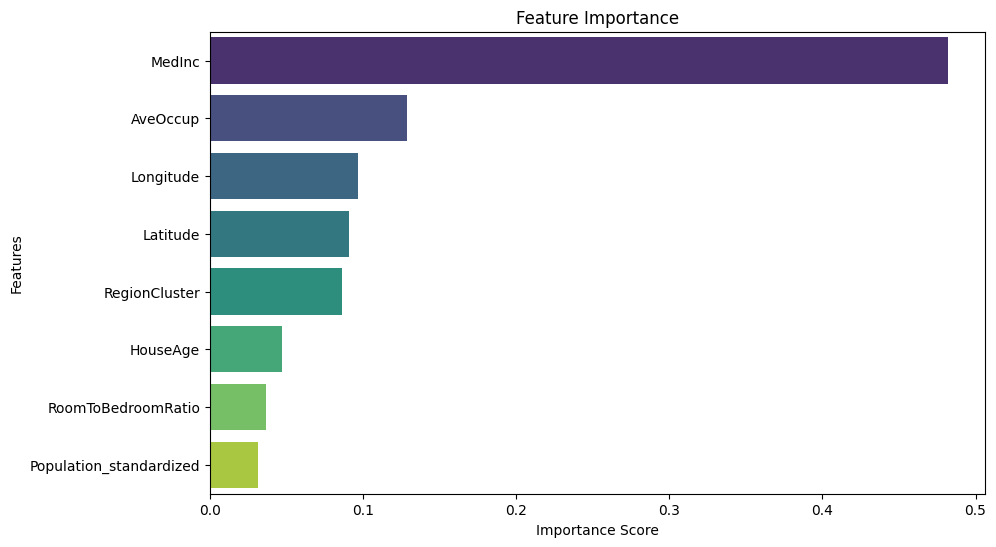

In [16]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(df.drop(columns=['target']), df['target'])

# Get feature importance
importance = model.feature_importances_
features = df.drop(columns=['target']).columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


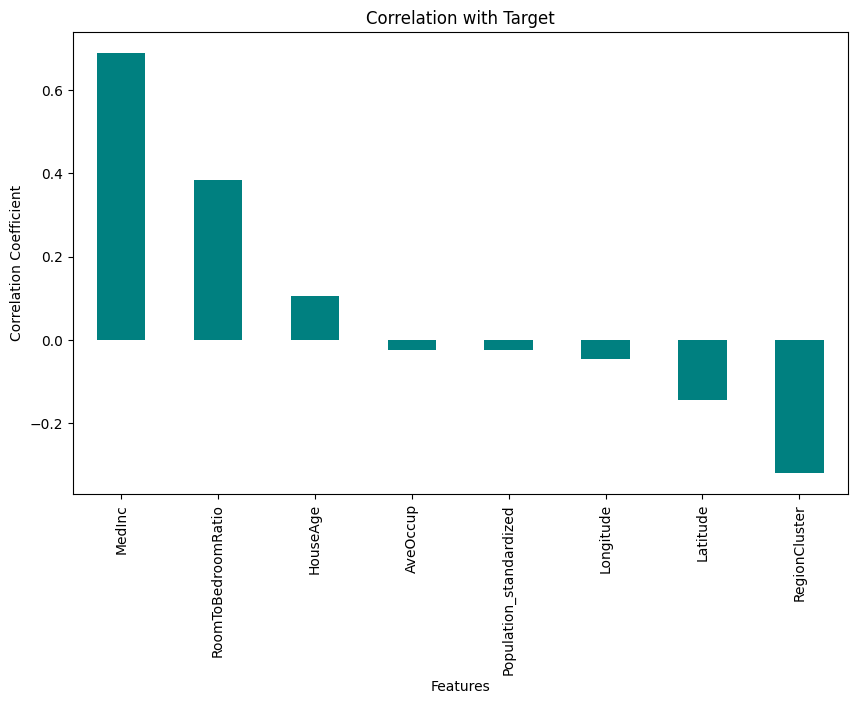

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation with target
correlation = df.corr()['target'].drop('target')

# Create a bar chart
plt.figure(figsize=(10, 6))
correlation.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Correlation with Target')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


In [18]:
from scipy.stats import zscore

# List of columns for which you want to calculate Z-scores
columns_to_standardize = ['Population_standardized', 'MedInc', 'RoomToBedroomRatio', 'HouseAge', 'AveOccup', 'RegionCluster']

# Calculate Z-scores for these columns
zscore_columns = [col + '_zscore' for col in columns_to_standardize]
df[zscore_columns] = df[columns_to_standardize].apply(zscore)

# Define threshold for Z-scores
threshold = 3

# Filter out rows where any of the Z-scores are greater than the threshold
df_no_outliers = df[(df[zscore_columns].abs() <= threshold).all(axis=1)]

# Check the result
print(df_no_outliers.head())


   MedInc  HouseAge  AveOccup  Latitude  Longitude  target  \
0  8.3252      41.0  2.555556     37.88    -122.23   4.526   
1  8.3014      21.0  2.109842     37.86    -122.22   3.585   
2  7.2574      52.0  2.802260     37.85    -122.24   3.521   
3  5.6431      52.0  2.547945     37.85    -122.25   3.413   
4  3.8462      52.0  2.181467     37.85    -122.25   3.422   

   RoomToBedroomRatio  RegionCluster  Population_standardized  \
0            6.821705              1                -0.974429   
1            6.418626              1                 0.861439   
2            7.721053              1                -0.820777   
3            5.421277              1                -0.766028   
4            5.810714              1                -0.759847   

   Population_standardized_zscore  MedInc_zscore  RoomToBedroomRatio_zscore  \
0                       -0.974429       2.344766                   1.568042   
1                        0.861439       2.332238                   1.224061   

In [19]:
X = df_no_outliers.drop(columns=['target'])
y = df_no_outliers['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

n = len(y_test)  # number of data points
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adj_r2}')

Mean Absolute Error (MAE): 0.49341531486860357
Mean Squared Error (MSE): 0.4568908894087327
Root Mean Squared Error (RMSE): 0.6759370454478233
R-squared (R²): 0.6437806616527757
Adjusted R-squared: 0.6425244725502918


In [20]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

n = len(y_test)  # number of data points
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adj_r2}')

Mean Absolute Error (MAE): 0.49341531486860357
Mean Squared Error (MSE): 0.4568908894087327
Root Mean Squared Error (RMSE): 0.6759370454478233
R-squared (R²): 0.6437806616527757
Adjusted R-squared: 0.6425244725502918


In [21]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

n = len(y_test)  # number of data points
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adj_r2}')

Mean Absolute Error (MAE): 0.49187420785688635
Mean Squared Error (MSE): 0.4725834444962827
Root Mean Squared Error (RMSE): 0.6874470485035794
R-squared (R²): 0.631545811451454
Adjusted R-squared: 0.6302464767815096


In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

n = len(y_test)  # number of data points
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adj_r2}')

Mean Absolute Error (MAE): 0.32164696178168134
Mean Squared Error (MSE): 0.2524578634367741
Root Mean Squared Error (RMSE): 0.5024518518592345
R-squared (R²): 0.803168819605089
Adjusted R-squared: 0.802474704611253


from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

n = len(y_test)  # number of data points
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adj_r2}')


In [23]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

n = len(y_test)  # number of data points
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adj_r2}')

Mean Absolute Error (MAE): 0.4304266814603012
Mean Squared Error (MSE): 0.4040789255821573
Root Mean Squared Error (RMSE): 0.6356720267419019
R-squared (R²): 0.6849560128082033
Adjusted R-squared: 0.6838450264553859


In [24]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

n = len(y_test)  # number of data points
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adj_r2}')

Mean Absolute Error (MAE): 0.4373958579673777
Mean Squared Error (MSE): 0.4015921327963914
Root Mean Squared Error (RMSE): 0.6337129735111878
R-squared (R²): 0.6868948645150048
Adjusted R-squared: 0.6857907154226144
